# New model

In [12]:
# Step 1: Load and inspect all dataset files
import pandas as pd

# ---- Short-answer dataset ----
data_all = pd.read_csv("/kaggle/input/visual-question-answering-computer-vision-nlp/dataset/data.csv")
data_train = pd.read_csv("/kaggle/input/visual-question-answering-computer-vision-nlp/dataset/data_train.csv")
data_eval = pd.read_csv("/kaggle/input/visual-question-answering-computer-vision-nlp/dataset/data_eval.csv")

print("Short-answer dataset:")
print("All data:", data_all.shape)
print("Train:", data_train.shape)
print("Eval:", data_eval.shape)

print("\nSample rows from training set:")
display(data_train.head(5))
print("\nColumns:", list(data_train.columns))


# ---- Full-answer dataset ----
train_full = pd.read_csv("/kaggle/input/vqa-fullanswer/train_data.csv")
eval_full = pd.read_csv("/kaggle/input/vqa-fullanswer/eval_data.csv")

print("\n Full-answer dataset:")
print("Train (full answers):", train_full.shape)
print("Eval (full answers):", eval_full.shape)

print("\nSample rows from full-answer training set:")
display(train_full.head(5))
print("\nColumns:", list(train_full.columns))

Short-answer dataset:
All data: (12468, 3)
Train: (9974, 3)
Eval: (2494, 3)

Sample rows from training set:


,question,answer,image_id
0,what is the object on the shelves,cup,image100
1,how man chairs are there,6,image888
2,what is hanged to the right side of the bed,curtain,image1174
3,how many picture are on the wall,2,image942
4,what is the object on the floor behind the rack,room_divider,image1220



Columns: ['question', 'answer', 'image_id']

 Full-answer dataset:
Train (full answers): (9974, 5)
Eval (full answers): (2494, 5)

Sample rows from full-answer training set:


,Unnamed: 0,question,answer,image_id,response
0,0,what is the object on the shelves,cup,image100,A cup is sitting on the shelves.
1,1,how man chairs are there,6,image888,There are six chairs in the room.
2,2,what is hanged to the right side of the bed,curtain,image1174,A curtain is often hung to the right side of t...
3,3,how many picture are on the wall,2,image942,There are two pictures on the wall.
4,4,what is the object on the floor behind the rack,room_divider,image1220,The object on the floor behind the rack is a r...



Columns: ['Unnamed: 0', 'question', 'answer', 'image_id', 'response']


In [13]:
# Step 2: Add image path column to full-answer dataset
import os

IMG_DIR = "/kaggle/input/visual-question-answering-computer-vision-nlp/dataset/images"

# Create full path for each image
train_full['image_path'] = train_full['image_id'].apply(lambda x: os.path.join(IMG_DIR, f"{x}.png"))
eval_full['image_path'] = eval_full['image_id'].apply(lambda x: os.path.join(IMG_DIR, f"{x}.png"))

print("Sample rows with image path:")
display(train_full[['question', 'response', 'image_path']].head())

Sample rows with image path:


,question,response,image_path
0,what is the object on the shelves,A cup is sitting on the shelves.,/kaggle/input/visual-question-answering-comput...
1,how man chairs are there,There are six chairs in the room.,/kaggle/input/visual-question-answering-comput...
2,what is hanged to the right side of the bed,A curtain is often hung to the right side of t...,/kaggle/input/visual-question-answering-comput...
3,how many picture are on the wall,There are two pictures on the wall.,/kaggle/input/visual-question-answering-comput...
4,what is the object on the floor behind the rack,The object on the floor behind the rack is a r...,/kaggle/input/visual-question-answering-comput...


Number of training samples: 9974
Number of evaluation samples: 2494

Columns: ['Unnamed: 0', 'question', 'answer', 'image_id', 'response', 'image_path']

Any missing values?
 Unnamed: 0    0
question      0
answer        0
image_id      0
response      0
image_path    0
dtype: int64

Duplicate (question, image_id) pairs: 197


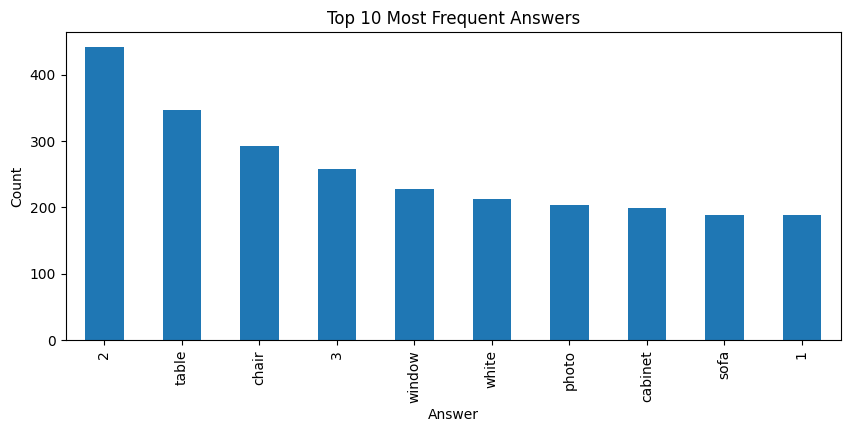

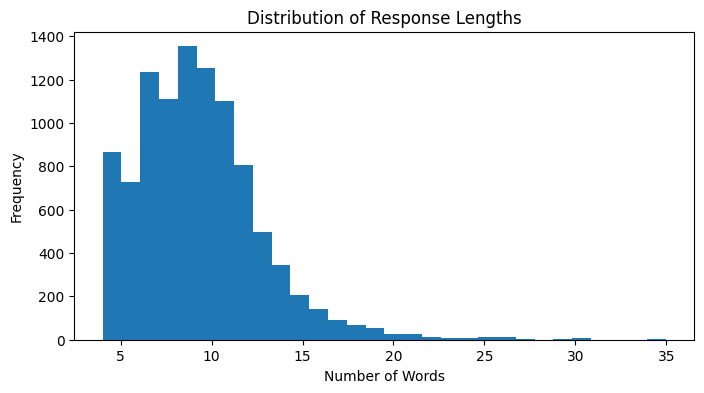

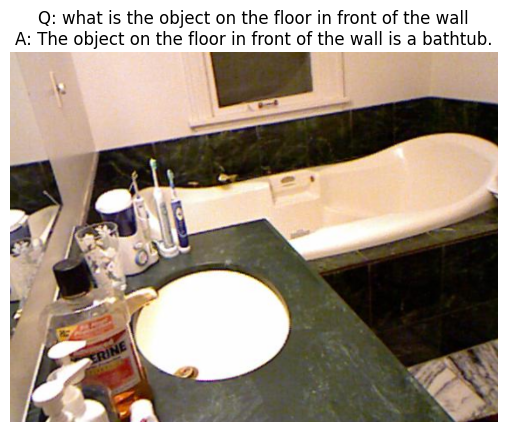

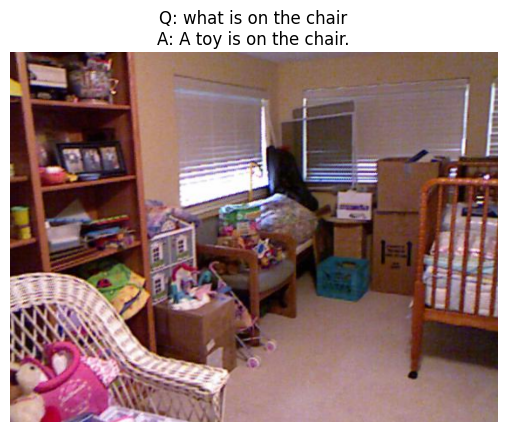

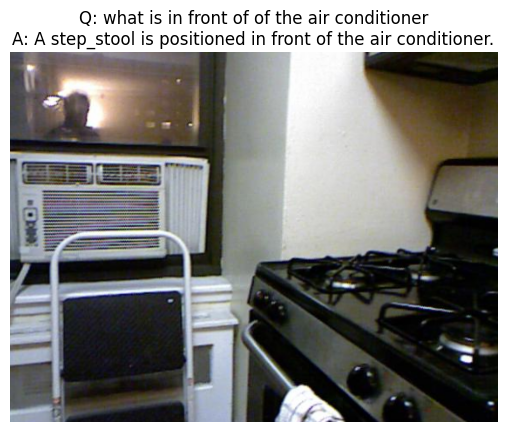

In [14]:
# Step 3: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
from PIL import Image
import random

# --- 1. Basic information ---
print("Number of training samples:", len(train_full))
print("Number of evaluation samples:", len(eval_full))
print("\nColumns:", list(train_full.columns))
print("\nAny missing values?\n", train_full.isnull().sum())

# --- 2. Check duplicates ---
dup_count = train_full.duplicated(subset=['question', 'image_id']).sum()
print(f"\nDuplicate (question, image_id) pairs: {dup_count}")

# --- 3. Distribution of short answers ---
plt.figure(figsize=(10,4))
train_full['answer'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Frequent Answers")
plt.xlabel("Answer")
plt.ylabel("Count")
plt.show()

# --- 4. Response length distribution ---
train_full['response_length'] = train_full['response'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,4))
plt.hist(train_full['response_length'], bins=30)
plt.title("Distribution of Response Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# --- 5. Visualize random samples ---
sample_rows = train_full.sample(3, random_state=42)

for _, row in sample_rows.iterrows():
    img_path = row['image_path']
    try:
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Q: {row['question']}\nA: {row['response']}")
        plt.show()
    except:
        print(f"⚠️ Could not open {img_path}")

In [8]:
!pip install transformers timm pillow accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.

In [9]:
# Step 4: Load pretrained BLIP model and run sample inference
from transformers import BlipProcessor, BlipForQuestionAnswering
from PIL import Image
import torch

# Load processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")

# Use GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Pick a random sample from your dataset
sample = train_full.sample(1, random_state=42).iloc[0]
image_path = sample["image_path"]
question = sample["question"]
true_response = sample["response"]

# Open image
raw_image = Image.open(image_path).convert('RGB')

# Preprocess inputs
inputs = processor(raw_image, question, return_tensors="pt").to(device)

# Get model prediction
with torch.no_grad():
    outputs = model.generate(**inputs)
predicted_answer = processor.decode(outputs[0], skip_special_tokens=True)

# Display results
print(" Image path:", image_path)
print("Question:", question)
print("Model Answer:", predicted_answer)
print("Ground Truth:", true_response)

2025-10-11 13:29:23.056643: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760189363.280900      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760189363.360007      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

 Image path: /kaggle/input/visual-question-answering-computer-vision-nlp/dataset/images/image509.png
Question: what is the object on the floor in front of the wall
Model Answer: bathtub
Ground Truth: The object on the floor in front of the wall is a bathtub.


In [10]:
# Step 5: Batch evaluation on eval dataset
from tqdm import tqdm

results = []

model.eval()  # set to eval mode
for idx, row in tqdm(eval_full.iterrows(), total=len(eval_full)):
    image_path = row["image_path"]
    question = row["question"]
    true_response = row["response"]
    
    try:
        raw_image = Image.open(image_path).convert('RGB')
        inputs = processor(raw_image, question, return_tensors="pt").to(device)
        
        with torch.no_grad():
            outputs = model.generate(**inputs)
        predicted_answer = processor.decode(outputs[0], skip_special_tokens=True)
        
        results.append({
            "image_id": row["image_id"],
            "question": question,
            "predicted": predicted_answer,
            "ground_truth": true_response
        })
        
    except Exception as e:
        print(f"⚠️ Error with image {image_path}: {e}")

# Convert results to DataFrame
import pandas as pd
df_results = pd.DataFrame(results)

# Quick sanity check: print first 5 predictions
display(df_results.head())

# Optional: Exact match metric (not perfect for sentences)
df_results["exact_match"] = df_results.apply(lambda x: x["predicted"].strip().lower() == x["ground_truth"].strip().lower(), axis=1)
accuracy = df_results["exact_match"].mean()
print(f"\nExact match accuracy: {accuracy*100:.2f}%")

100%|██████████| 2494/2494 [04:10<00:00,  9.95it/s]


,image_id,question,predicted,ground_truth
0,image399,what is the colour of the bag on the chair,pink,The bag on the chair is pink.
1,image1341,what is at the right bottom,wooden chair,"At the right bottom of the room, there is a sm..."
2,image1320,what are found on the rack,bottles,Toys are often found on the rack in a child's ...
3,image529,what is left of printer,printer,"The only thing left of the printer, surprising..."
4,image201,what is the colour of television,black,The television's color is predominantly black.



Exact match accuracy: 0.00%


In [11]:
import gradio as gr
from PIL import Image
from transformers import BlipProcessor, BlipForQuestionAnswering
import torch

# Load BLIP model
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base")
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
model.eval()

# Function to answer questions
def answer_vqa(image, question):
    if image is None or question.strip() == "":
        return "Please provide an image and a question."
    
    inputs = processor(image, question, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model.generate(**inputs)
    answer = processor.decode(outputs[0], skip_special_tokens=True)
    return answer

# Build Gradio interface
iface = gr.Interface(
    fn=answer_vqa,
    inputs=[
        gr.Image(type="pil", label="Upload Image"),
        gr.Textbox(lines=2, placeholder="Type your question here", label="Question")
    ],
    outputs=gr.Textbox(label="Answer"),
    title="🖼️ Visual Question Answering Chatbot",
    description="Upload an image and ask any question about it. The model will answer using BLIP pretrained VQA."
)

# Launch the interface
iface.launch()

* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://f1cd75b6430d0ed910.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# For full answers

In [44]:
from transformers import BlipProcessor, BlipForQuestionAnswering
from PIL import Image
import torch

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
blip_model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base").to(device)
blip_model.eval()

def get_blip_short_answer(image_path, question):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(image, question, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = blip_model.generate(**inputs)
    answer = processor.decode(outputs[0], skip_special_tokens=True)
    return answer

In [46]:
import pandas as pd
import os
from PIL import Image
import torch
from tqdm import tqdm
from transformers import BlipProcessor, BlipForQuestionAnswering, T5Tokenizer
from datasets import Dataset

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Enable tqdm for pandas
tqdm.pandas()

# -----------------------------
# Step 1: Load datasets
# -----------------------------
train_full = pd.read_csv("/kaggle/input/vqa-fullanswer/train_data.csv")
eval_full = pd.read_csv("/kaggle/input/vqa-fullanswer/eval_data.csv")

# -----------------------------
# Step 2: Add image paths
# -----------------------------
IMG_DIR = "/kaggle/input/visual-question-answering-computer-vision-nlp/dataset/images"

train_full['image_path'] = train_full['image_id'].apply(lambda x: os.path.join(IMG_DIR, f"{x}.png"))
eval_full['image_path'] = eval_full['image_id'].apply(lambda x: os.path.join(IMG_DIR, f"{x}.png"))

In [47]:
train_cache_path = "train_blip_answers.csv"
eval_cache_path = "eval_blip_answers.csv"

# Train dataset
if os.path.exists(train_cache_path):
    train_full = pd.read_csv(train_cache_path)
else:
    train_full['blip_answer'] = train_full.progress_apply(
        lambda row: get_blip_short_answer(row['image_path'], row['question']), axis=1
    )
    train_full.to_csv(train_cache_path, index=False)

# Eval dataset
if os.path.exists(eval_cache_path):
    eval_full = pd.read_csv(eval_cache_path)
else:
    eval_full['blip_answer'] = eval_full.progress_apply(
        lambda row: get_blip_short_answer(row['image_path'], row['question']), axis=1
    )
    eval_full.to_csv(eval_cache_path, index=False)

100%|██████████| 2494/2494 [04:11<00:00,  9.91it/s]


In [48]:
train_full['input_text'] = train_full['question'] + " | " + train_full['blip_answer']
train_full['target_text'] = train_full['response']

eval_full['input_text'] = eval_full['question'] + " | " + eval_full['blip_answer']
eval_full['target_text'] = eval_full['response']

# Quick sanity check
display(train_full[['input_text','target_text']].head())

,input_text,target_text
0,what is the object on the shelves | mugs,A cup is sitting on the shelves.
1,how man chairs are there | 6,There are six chairs in the room.
2,what is hanged to the right side of the bed | ...,A curtain is often hung to the right side of t...
3,how many picture are on the wall | 3,There are two pictures on the wall.
4,what is the object on the floor behind the rac...,The object on the floor behind the rack is a r...


In [53]:
model_name = "t5-base"
tokenizer = T5Tokenizer.from_pretrained(model_name)

max_input_length = 128
max_target_length = 128

def tokenize_data(examples):
    inputs = tokenizer(examples['input_text'], truncation=True, padding="max_length", max_length=max_input_length)
    targets = tokenizer(examples['target_text'], truncation=True, padding="max_length", max_length=max_target_length)
    inputs['labels'] = targets['input_ids']
    return inputs

# Convert pandas to HuggingFace Dataset
train_dataset = Dataset.from_pandas(train_full[['input_text','target_text']])
eval_dataset = Dataset.from_pandas(eval_full[['input_text','target_text']])

train_dataset = train_dataset.map(tokenize_data, batched=True)
eval_dataset = eval_dataset.map(tokenize_data, batched=True)

print("✅ Dataset ready for T5 fine-tuning")

Map:   0%|          | 0/9974 [00:00<?, ? examples/s]

Map:   0%|          | 0/2494 [00:00<?, ? examples/s]

✅ Dataset ready for T5 fine-tuning


In [54]:
from transformers import T5ForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq

# Load T5 model
model = T5ForConditionalGeneration.from_pretrained("t5-base").to(device)

# Data collator to batch examples
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [60]:
training_args = Seq2SeqTrainingArguments(
    output_dir="vqa_t5_blipqa",
    save_steps=500,
    save_total_limit=2,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    learning_rate=5e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    predict_with_generate=True,
    logging_steps=100,
    fp16=torch.cuda.is_available(),
    report_to="none"
)

In [61]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator
)

# Start training
trainer.train()

/tmp/ipykernel_36/1530963620.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss
100,1.864500
200,0.131600
300,0.115100
400,0.106200
500,0.097000
600,0.103000
700,0.092300
800,0.092900
900,0.089500
1000,0.091400


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked t

TrainOutput(global_step=3741, training_loss=0.12896456944053425, metrics={'train_runtime': 2033.6671, 'train_samples_per_second': 14.713, 'train_steps_per_second': 1.84, 'total_flos': 4555309500334080.0, 'train_loss': 0.12896456944053425, 'epoch': 3.0})

In [62]:
model.save_pretrained("vqa_t5_blipqa")
tokenizer.save_pretrained("vqa_t5_blipqa")

('vqa_t5_blipqa/tokenizer_config.json',
 'vqa_t5_blipqa/special_tokens_map.json',
 'vqa_t5_blipqa/spiece.model',
 'vqa_t5_blipqa/added_tokens.json')

In [69]:
import gradio as gr
from PIL import Image
import torch
from transformers import BlipProcessor, BlipForQuestionAnswering, T5Tokenizer, T5ForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
blip_model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base").to(device)
blip_model.eval()

model_dir = "vqa_t5_blipqa"  # your fine-tuned model folder
tokenizer = T5Tokenizer.from_pretrained(model_dir)
t5_model = T5ForConditionalGeneration.from_pretrained(model_dir).to(device)
t5_model.eval()
blip_cache = {}  

def get_blip_short_answer_cached(image, question):
    # Create a simple hash key
    image_hash = hash(image.tobytes())
    key = (image_hash, question)
    
    if key in blip_cache:
        return blip_cache[key]
    
    # Run BLIP inference
    img = image.convert("RGB")
    inputs = processor(img, question, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = blip_model.generate(**inputs)
    answer = processor.decode(outputs[0], skip_special_tokens=True)
    
    blip_cache[key] = answer  # store in cache
    return answer

def vqa_full_answer_blipqa(image, question):
    blip_answer = get_blip_short_answer_cached(image, question)
    input_text = question + " | " + blip_answer
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=128).to(device)
    
    with torch.no_grad():
        outputs = t5_model.generate(
            **inputs,
            max_length=128,
            do_sample=False,       
            num_beams=5,           
            early_stopping=True
        )
    answer = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return answer

iface = gr.Interface(
    fn=vqa_full_answer_blipqa,
    inputs=[gr.Image(type="pil"), gr.Textbox(lines=2, placeholder="Ask a question")],
    outputs=[gr.Textbox(label="Full Answer")],
    title="Dataset-Style Full Answer VQA Chatbot",
    description="BLIP-QA grounded T5 generates dataset-style full answers."
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7871
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://e6e681b74c9983f6db.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# For testing

In [15]:
import pandas as pd
import os
from PIL import Image

# Paths
IMG_DIR = "/kaggle/input/visual-question-answering-computer-vision-nlp/dataset/images"
TEST_CSV = "/kaggle/input/vqa-fullanswer/eval_data.csv"

# Load test data
test_full = pd.read_csv(TEST_CSV)

# Add full image paths
test_full['image_path'] = test_full['image_id'].apply(lambda x: os.path.join(IMG_DIR, f"{x}.png"))

# Quick check
display(test_full.head())

,Unnamed: 0,question,answer,image_id,response,image_path
0,0,what is the colour of the bag on the chair,pink,image399,The bag on the chair is pink.,/kaggle/input/visual-question-answering-comput...
1,1,what is at the right bottom,table,image1341,"At the right bottom of the room, there is a sm...",/kaggle/input/visual-question-answering-comput...
2,2,what are found on the rack,toy,image1320,Toys are often found on the rack in a child's ...,/kaggle/input/visual-question-answering-comput...
3,3,what is left of printer,mirror,image529,"The only thing left of the printer, surprising...",/kaggle/input/visual-question-answering-comput...
4,4,what is the colour of television,black,image201,The television's color is predominantly black.,/kaggle/input/visual-question-answering-comput...


In [17]:
!pip install rapidfuzz

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 36.2 MB/s eta 0:00:0000:0100:01


In [18]:
from rapidfuzz import fuzz

# Replace this with your actual VQA function
# If you integrated COCO+BLIP, use that function instead
def get_model_answer(image, question):
    return vqa_full_answer_blipqa(image, question)  # or your COCO+BLIP version

def fuzzy_match(a, b, threshold=80):
    return fuzz.ratio(a.lower(), b.lower()) >= threshold

In [19]:
results = []

for idx, row in test_full.iterrows():
    try:
        image = Image.open(row['image_path']).convert('RGB')
        question = row['question']
        true_answer = row['response'].strip()
        
        predicted_answer = get_model_answer(image, question).strip()
        
        results.append({
            "image_id": row["image_id"],
            "question": question,
            "predicted": predicted_answer,
            "ground_truth": true_answer,
            "exact_match": predicted_answer.lower() == true_answer.lower(),
            "fuzzy_match": fuzzy_match(predicted_answer, true_answer)
        })
    except Exception as e:
        print(f"Error processing {row['image_id']}: {e}")

Error processing image399: name 'vqa_full_answer_blipqa' is not defined
Error processing image1341: name 'vqa_full_answer_blipqa' is not defined
Error processing image1320: name 'vqa_full_answer_blipqa' is not defined
Error processing image529: name 'vqa_full_answer_blipqa' is not defined
Error processing image201: name 'vqa_full_answer_blipqa' is not defined
Error processing image1439: name 'vqa_full_answer_blipqa' is not defined
Error processing image477: name 'vqa_full_answer_blipqa' is not defined
Error processing image1362: name 'vqa_full_answer_blipqa' is not defined
Error processing image838: name 'vqa_full_answer_blipqa' is not defined
Error processing image73: name 'vqa_full_answer_blipqa' is not defined
Error processing image384: name 'vqa_full_answer_blipqa' is not defined
Error processing image343: name 'vqa_full_answer_blipqa' is not defined
Error processing image721: name 'vqa_full_answer_blipqa' is not defined
Error processing image60: name 'vqa_full_answer_blipqa' is no

KeyboardInterrupt: 

In [88]:
df_results = pd.DataFrame(results)

exact_acc = df_results["exact_match"].mean()
fuzzy_acc = df_results["fuzzy_match"].mean()

print(f"Exact Match Accuracy: {exact_acc*100:.2f}%")
print(f"Fuzzy Match Accuracy: {fuzzy_acc*100:.2f}%")

# Optional: save results
df_results.to_csv("vqa_test_predictions.csv", index=False)

Exact Match Accuracy: 19.33%
Fuzzy Match Accuracy: 54.33%


In [97]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from tqdm import tqdm
import os
from rapidfuzz import fuzz
from PIL import Image
import torch

# Dataset class 
class VQADatasetPaths(Dataset):
    def __init__(self, df, img_dir):
        self.data = df.copy()
        self.img_dir = img_dir
        self.data['image_path'] = self.data['image_id'].apply(lambda x: os.path.join(img_dir, f"{x}.png"))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        return row['image_path'], row['question'], row['response']

IMG_DIR = "/kaggle/input/visual-question-answering-computer-vision-nlp/dataset/images"
eval_df = pd.read_csv("/kaggle/input/vqa-fullanswer/eval_data.csv")

eval_dataset = VQADatasetPaths(eval_df, IMG_DIR)
eval_loader = DataLoader(eval_dataset, batch_size=1, shuffle=False)

def evaluate_full_answer_vqa(blip_model, t5_model, tokenizer, processor, dataloader, device, threshold=70):
    t5_model.eval()
    blip_model.eval()
    total = 0
    correct = 0
    all_results = []

    for image_paths, questions, targets in tqdm(dataloader):
        image_path = image_paths[0]
        question = questions[0]
        ground_truth = targets[0]

        # Step 1: Get BLIP short answer
        blip_answer = get_blip_short_answer(image_path, question)

        # Step 2: Generate full answer using T5
        input_text = question + " | " + blip_answer
        inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=128).to(device)

        with torch.no_grad():
            outputs = t5_model.generate(**inputs, max_length=128)
        full_answer = tokenizer.decode(outputs[0], skip_special_tokens=True)

        # Step 3: Save results
        all_results.append({
            "question": question,
            "blip_answer": blip_answer,
            "full_answer": full_answer,
            "ground_truth": ground_truth
        })

        # Step 4: Fuzzy match between generated full answer and ground truth
        similarity = fuzz.partial_ratio(full_answer.lower(), ground_truth.lower())
        if similarity >= threshold:
            correct += 1
        total += 1

    accuracy = correct / total
    return accuracy, all_results

accuracy, results = evaluate_full_answer_vqa(
    blip_model=blip_model,
    t5_model=t5_model,           # Your trained T5 full-answer model
    tokenizer=tokenizer,
    processor=processor,
    dataloader=eval_loader,
    device=device,
    threshold=80
)

print(f"Fuzzy-match accuracy (threshold 80): {accuracy*100:.2f}%")

# Optional: convert results to DataFrame
df_results = pd.DataFrame(results)
df_results.head()

100%|██████████| 2494/2494 [14:17<00:00,  2.91it/s]

Fuzzy-match accuracy (threshold 80): 70.25%


,question,blip_answer,full_answer,ground_truth
0,what is the colour of the bag on the chair,pink,The bag on the chair is pink.,The bag on the chair is pink.
1,what is at the right bottom,wooden chair,A chair is located at the right bottom of the ...,"At the right bottom of the room, there is a sm..."
2,what are found on the rack,bottles,A bottle and a bottle of liquid are found on t...,Toys are often found on the rack in a child's ...
3,what is left of printer,printer,The only thing left of the printer is the pape...,"The only thing left of the printer, surprising..."
4,what is the colour of television,black,The television is black.,The television's color is predominantly black.


In [6]:
import gradio as gr
from PIL import Image
import torch
from transformers import BlipProcessor, BlipForQuestionAnswering, T5ForConditionalGeneration, T5Tokenizer

# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# ---------- Load Models ----------
# BLIP model for visual QA short answer
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
blip_model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base").to(device)
blip_model.eval()

# Load your fine-tuned T5 model
model_dir = "/kaggle/input/nlp_final/pytorch/default/1"  # <-- your saved model folder
tokenizer = T5Tokenizer.from_pretrained(model_dir)
t5_model = T5ForConditionalGeneration.from_pretrained(model_dir).to(device)
t5_model.eval()

# Cache for BLIP answers
blip_cache = {}

def get_blip_short_answer_cached(image, question):
    img_hash = hash(image.tobytes())
    key = (img_hash, question)

    if key in blip_cache:
        return blip_cache[key]

    inputs = processor(image.convert("RGB"), question, return_tensors="pt").to(device)
    with torch.no_grad():
        output = blip_model.generate(**inputs)
    ans = processor.decode(output[0], skip_special_tokens=True)
    
    blip_cache[key] = ans
    return ans

def vqa_full_answer(image, question):
    blip_ans = get_blip_short_answer_cached(image, question)
    input_text = question + " | " + blip_ans
    
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=128).to(device)

    with torch.no_grad():
        outputs = t5_model.generate(
            **inputs,
            max_length=128,
            num_beams=5,
            do_sample=False,
            early_stopping=True
        )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ---------- Gradio UI ----------
iface = gr.Interface(
    fn=vqa_full_answer,
    inputs=[gr.Image(type="pil"), gr.Textbox(label="Ask a Question")],
    outputs=[gr.Textbox(label="Answer")],
    title="Visual Question Answering (Full Answer Generator)",
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7864
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://232c375f42f024c34e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# AI chatbot

In [ ]:
import gradio as gr
from PIL import Image
import torch
import requests
from transformers import BlipProcessor, BlipForQuestionAnswering, T5Tokenizer, T5ForConditionalGeneration

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-base")
blip_model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-base").to(device)
blip_model.eval()

# ✅ Load your saved T5 model (not the training folder)
t5_model_name = "/kaggle/input/nlp_final/pytorch/default/1"
tokenizer = T5Tokenizer.from_pretrained(t5_model_name)
t5_model = T5ForConditionalGeneration.from_pretrained(t5_model_name).to(device)
t5_model.eval()

API_KEY = "XXXXXXXXXXXXXXXX" #Your API_KEY
ENDPOINT = "https://api.groq.com/openai/v1/chat/completions"
MODEL = "groq/compound-mini"

# ---------- Functions ----------
def call_groq_chat(question, context="You are a helpful AI assistant."):
    headers = {"Authorization": f"Bearer {API_KEY}", "Content-Type": "application/json"}
    data = {
        "model": MODEL,
        "messages": [
            {"role": "system", "content": context},
            {"role": "user", "content": question}
        ],
        "max_tokens": 300
    }
    try:
        response = requests.post(ENDPOINT, headers=headers, json=data)
        result = response.json()
        answer = result["choices"][0]["message"]["content"]
    except:
        answer = "Sorry, I couldn't get a response from the AI API."
    return answer

def get_blip_short_answer(image, question):
    inputs = processor(image, question, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = blip_model.generate(**inputs)
    return processor.decode(outputs[0], skip_special_tokens=True)

def get_t5_full_answer(question, blip_answer):
    input_text = question + " | " + blip_answer
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = t5_model.generate(**inputs, max_length=128)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Step 1: Get short dataset answer
def get_dataset_answer(image, question):
    try:
        blip_answer = get_blip_short_answer(image, question)
        t5_answer = get_t5_full_answer(question, blip_answer)
        return t5_answer
    except:
        return "Dataset answer not available."

# Step 2: Get AI elaboration
def get_ai_elaboration(question, dataset_answer):
    return call_groq_chat(question, context=f"Dataset answer: {dataset_answer}. Elaborate naturally.")

# ---------- Gradio Interface ----------
with gr.Blocks(title="Image Recognition Chatbot") as demo:
    gr.Markdown("""
    ## Conversational Image Recognition Chatbot
    This chatbot answers visual questions using dataset-grounded reasoning and provides deeper conversational elaboration through AI.
    """)
    with gr.Row():
        with gr.Column():  # Left: Inputs
            image_input = gr.Image(type="pil", label="Upload Image")
            question_input = gr.Textbox(lines=2, placeholder="Ask a question", label="Question")
            submit_btn = gr.Button("Ask")
        with gr.Column():  # Right: Outputs
            short_answer_box = gr.Textbox(label="Dataset Answer", lines=3)
            know_more_btn = gr.Button("Know More")
            ai_elaboration_box = gr.Markdown(label="AI Elaboration")

    submit_btn.click(
        fn=get_dataset_answer,
        inputs=[image_input, question_input],
        outputs=[short_answer_box]
    )

    know_more_btn.click(
        fn=get_ai_elaboration,
        inputs=[question_input, short_answer_box],
        outputs=[ai_elaboration_box]
    )

demo.launch()

* Running on local URL:  http://127.0.0.1:7862
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://79d3ffa39a61e1f515.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [21]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

model_path = "/kaggle/input/nlp_final/pytorch/default/1"  # folder where you saved the model
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path).to("cuda")
model.eval()

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


T5ForConditionalGeneration(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dro

In [24]:
import pandas as pd
test_df = pd.read_csv("/kaggle/input/vqa-fullanswer/eval_data.csv")  
predictions = []
references = []

for text, target in zip(test_df['question'], test_df['response']):
    inputs = tokenizer(text, return_tensors="pt", truncation=True).to("cuda")
    
    with torch.no_grad():
        output = model.generate(
            **inputs,
            max_length=64,
            num_beams=4
        )
    
    pred = tokenizer.decode(output[0], skip_special_tokens=True)
    predictions.append(pred)
    references.append(target)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [25]:
test_df["prediction"] = predictions
test_df.to_csv("model_predictions.csv", index=False)

In [27]:
!pip install sacrebleu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.7 MB/s eta 0:00:00


In [28]:
import sacrebleu

corpus_bleu = sacrebleu.corpus_bleu(predictions, [references])
print("Corpus BLEU:", corpus_bleu.score)

Corpus BLEU: 53.48669204116421
